# Workshop 6
In last week's lecture you learned about _many-objective optimisation_, where the number of objectives an optimisation problem is described by means that standard visualisation techniques cannot be used. This week's workshop will use Matplotlib to implement some visualisations of a 9-objective dataset.

## Exercise 1
In last week's lecture you saw visualisations of the 9-objective _radar waveform design_ optimisation problem. The data is available on the DLE as a CSV file. Download it and use the [_Pandas_](https://pandas.pydata.org/docs/user_guide/index.html) module to load it. Convert the resulting Pandas object into a Numpy array.

In [26]:
import pandas as pd
import numpy as np
radarData = pd.read_csv("radar.csv")
radarArray = np.array(radarData)
N,M = np.shape(radarArray)
print(N,M)

199 9


## Exercise 2
Convert the data to _rank coordinates_. This means, given the 200 solutions in this data, you must have a Numpy array that is 200x9 dimensionality in which each column ranks the solution according to one of the objectives. For example, if the entry ``X[i,0]`` has the 5th best score on the first objective then in the new Numpy array (call it ``R``), ``R[i,0]=5``. You can use the function [rankdata](https://pandas.pydata.org/docs/user_guide/index.html) to rank your columns. Try out this function before you start coding your answer to see what it does.

You may find it useful to write pseudocode to plan your solution before you start coding. Using the ``rankdata`` function you will require a single for-loop to complete the task.

In [36]:
from scipy.stats import rankdata
rankArray = np.empty([199, 9])
for col in range(M):
    rankArray[:,col] = rankdata(radarArray[:,col])
print(rankArray)
    

[[ 23.  191.    6.  ...  49.  181.  189. ]
 [134.   18.  125.  ...  81.   23.   74. ]
 [ 75.5  95.   71.  ...  92.   54.  132. ]
 ...
 [ 31.  161.   40.  ...  29.  154.  160. ]
 [195.5  85.  180.  ... 192.  150.   11. ]
 [104.5  55.  112.  ...  69.   60.   95. ]]


## Exercise 3
Use the rank-coordinate version of your data to plot a _heatmap_ using the Matplotlib _pcolor_ function. Your heatmap should have labelled axes and objective numbers. Write a function called ``plot_heatmap`` to do this.

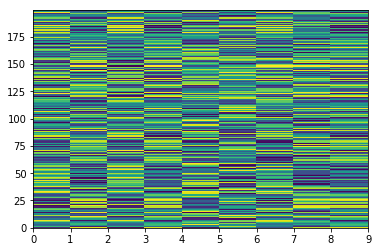

In [55]:
from matplotlib import pyplot as plt

def plot_heatmap(dataToPlot):
    
    rankMap = plt.pcolor(dataToPlot)

plot_heatmap(rankArray)

## Exercise 4
Modify the ``plot_heatmap`` function to take an argument that specifies which column should be ordered by. Use the Numpy ``argsort`` function to re-order the heatmap rows according to the specified column. If the value ``None`` is provided for this argument then no sorting should take place.

Sorted by column 5


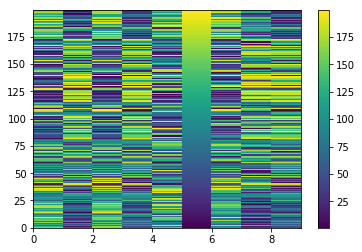

In [77]:
def plot_heatmapCols(dataToPlot, orderCol):
    
    if orderCol != None:
        sorted = dataToPlot[np.argsort(dataToPlot[:,orderCol])]
        print("Sorted by column", orderCol)
    rankMap = plt.pcolor(sorted)
    plt.colorbar(rankMap)

plot_heatmapCols(rankArray, 5)

## Exercise 5
An alternative to using a heatmap, which displays all of the objectives, is to use dimension reduction to project the data into 2-dimensions for visualisation with a scatter plot. Use the _sklearn_ implementation of _PCA_ to visualise the 9-objective data. Write a function to do this.

Your function should colour each solution according to the objective on which it has the best rank. This means you will need to find which column in the ``R`` array (see above) has the lowest score for each row. Create a new array called ``colours``, which is 200 elements long (use ``colours = np.zeros(200)`` to do this). Then, for each row ``i``, the value of ``colours[i]`` is the column index with the lowest value for that row. For example, given ``R[47,:] = [34, 76, 200, 14, 37, 53, 126, 174, 199]`` then ``colours[47] = 3`` because the value 14 is in the fourth column (column 3, according to 0-indexing).

Pass the ``colours`` array to the ``scatter`` function and specify the ``viridis`` cmap. See the [``scatter``](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html) documentation for more details.

In [85]:
import sklearn.decomposition

def reduceDimensions(inArray):
    colours = np.zeros(199)
    
    #Project the data into two dimensions for visualisation.
    pca = sklearn.decomposition.PCA(n_components=2)
    compressed = pca.fit_transform(inArray)
    
    for row in range(N):
        colours[row] = np.amin(inArray[row, :])
    
    # Plot the data. Colour according to class (the 'colours' variable).
    plt.scatter(compressed[:,0], compressed[:,1], c=colours, cmap="viridis")    
    
    plt.show()
    
reduceDimensions(radarArray)

    
    

